### Pair Programming Intro Machine Learning
Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos sobre la Regresión Lineal Simple I. Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. De forma que vamos a probar a realizar ajustes lineales con el fin de predecir alguna de sus variables. Este dataset será el que iremos usando a lo largo de todas las sesiones de pairprogramming de regresión lineal.
Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,8)
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None
#pd.options.display.max_rows=None

## Objetivos

Los objetivos de hoy son:

1. Buscar un conjunto de datos a analizar:

- Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.



In [3]:
df=pd.read_csv("datos/sephora_website_dataset.csv", index_col=0)

In [4]:
df.head(3)

,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
id,,,,,,,,,,,,,,,,,,,,
2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,https://www.sephora.com/product/blu-mediterran...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,https://www.sephora.com/product/colonia-P16360...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,https://www.sephora.com/product/blu-mediterran...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0


### Explicación variables

- id   --->                 int   --->    The product ID at Sephora's website

- marca	--->              object  --->    The brand of the product at Sephora's website

- category --->            object  --->    The category of the product at Sephora's website

- nombre --->              object  --->    The name of the product at Sephora's website

- Talla	--->               object  --->	  The size of the product

- rating --->             float  --->	    The rating of the product

- number_of_reviews      	 int   --->     The number of reviews of the product

- love	--->               int	 --->     The number of people loving the product

- price	--->              float  --->     The price of the product

- value_price	--->        float	 --->     The value price of the product (for discounted products

- URL	--->                object --->     The URL link of the product

- MarketingFlags --->       bool	 --->     The Marketing Flags of the product from the website if they were exclusive or sold online only

- MarketingFlags_content  object --->	    The kinds of Marketing Flags of the product

- options	--->            object --->	    The options available on the website for the product like colors and sizes

- details	--->            object --->	    The details of the product available on the website

- how_to_use --->         object --->     The instructions of the product if available

- ingredients	--->        object --->     The ingredients of the product if available

- online_only	--->          int	  --->    If the product is sold online only

- exclusive	--->            int	  --->    If the product is sold exclusively on Sephora's website

- limited_edition	--->      int	  --->    If the product is limited edition

- limited_time_offer --->   int	  --->    If the product has a limited time offer

2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:

- Esto se hace para que comprendais mejor los datos con los que estais trabajando.
- Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [5]:
df.columns

Index(['brand', 'category', 'name', 'size', 'rating', 'number_of_reviews',
       'love', 'price', 'value_price', 'URL', 'MarketingFlags',
       'MarketingFlags_content', 'options', 'details', 'how_to_use',
       'ingredients', 'online_only', 'exclusive', 'limited_edition',
       'limited_time_offer'],
      dtype='object')

In [6]:
print(f'El numero de filas es: {df.shape[0]}, y el numero de columnas es: {df.shape[1]}')

El numero de filas es: 9168, y el numero de columnas es: 20


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9168 entries, 2218774 to 304
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   brand                   9168 non-null   object 
 1   category                9168 non-null   object 
 2   name                    9168 non-null   object 
 3   size                    9168 non-null   object 
 4   rating                  9168 non-null   float64
 5   number_of_reviews       9168 non-null   int64  
 6   love                    9168 non-null   int64  
 7   price                   9168 non-null   float64
 8   value_price             9168 non-null   float64
 9   URL                     9168 non-null   object 
 10  MarketingFlags          9168 non-null   bool   
 11  MarketingFlags_content  9168 non-null   object 
 12  options                 9168 non-null   object 
 13  details                 9168 non-null   object 
 14  how_to_use              9168 non-nu

In [8]:
df.isnull().sum()*100/df.shape[0]

brand                     0.0
category                  0.0
name                      0.0
size                      0.0
rating                    0.0
number_of_reviews         0.0
love                      0.0
price                     0.0
value_price               0.0
URL                       0.0
MarketingFlags            0.0
MarketingFlags_content    0.0
options                   0.0
details                   0.0
how_to_use                0.0
ingredients               0.0
online_only               0.0
exclusive                 0.0
limited_edition           0.0
limited_time_offer        0.0
dtype: float64

In [9]:
df.duplicated().sum()

0

Tras el analisis exploratorio de los datos, concluimos que no es necesaria una depuracion del dataset

In [10]:
round(df.describe(),2)

,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
count,9168.00,9168.00,9168.00,9168.00,9168.00,9168.00,9168.00,9168.00,9168.00
mean,3.99,282.14,16278.59,50.06,51.82,0.23,0.26,0.09,0.00
std,1.01,890.64,42606.51,47.16,49.46,0.42,0.44,0.29,0.02
min,0.00,0.00,0.00,2.00,2.00,0.00,0.00,0.00,0.00
25%,4.00,10.00,1600.00,24.00,25.00,0.00,0.00,0.00,0.00
50%,4.00,46.00,4800.00,35.00,35.00,0.00,0.00,0.00,0.00
75%,4.50,210.00,13800.00,59.00,60.00,0.00,1.00,0.00,0.00
max,5.00,19000.00,1300000.00,549.00,549.00,1.00,1.00,1.00,1.00


In [11]:
df.describe(include='object').T

,count,unique,top,freq
brand,9168,324,SEPHORA COLLECTION,496
category,9168,143,Perfume,665
name,9168,9106,Blush,4
size,9168,1623,no size,3161
URL,9168,9168,https://www.sephora.com/product/blu-mediterran...,1
MarketingFlags_content,9168,10,0,4786
options,9168,564,no options,8377
details,9168,8839,no details,14
how_to_use,9168,6497,no instructions,1573
ingredients,9168,6962,unknown,1630


In [12]:
df.corr()

,rating,number_of_reviews,love,price,value_price,MarketingFlags,online_only,exclusive,limited_edition,limited_time_offer
rating,1.000000,0.081478,0.094788,0.019559,0.001941,-0.108410,-0.123342,-0.001908,-0.130471,0.006164
number_of_reviews,0.081478,1.000000,0.746099,-0.084001,-0.088855,-0.096984,-0.137082,0.003799,-0.066661,0.000742
love,0.094788,0.746099,1.000000,-0.088724,-0.091140,-0.057228,-0.138933,0.050957,-0.046750,-0.002879
price,0.019559,-0.084001,-0.088724,1.000000,0.983357,-0.056920,0.117250,-0.178809,0.015333,-0.009679
value_price,0.001941,-0.088855,-0.091140,0.983357,1.000000,-0.028660,0.130658,-0.159005,0.079754,-0.009874
MarketingFlags,-0.108410,-0.096984,-0.057228,-0.056920,-0.028660,1.000000,0.578973,0.627080,0.332344,0.018908
online_only,-0.123342,-0.137082,-0.138933,0.117250,0.130658,0.578973,1.000000,-0.077543,0.097353,-0.010023
exclusive,-0.001908,0.003799,0.050957,-0.178809,-0.159005,0.627080,-0.077543,1.000000,0.166162,0.002814
limited_edition,-0.130471,-0.066661,-0.046750,0.015333,0.079754,0.332344,0.097353,0.166162,1.000000,0.015129
limited_time_offer,0.006164,0.000742,-0.002879,-0.009679,-0.009874,0.018908,-0.010023,0.002814,0.015129,1.000000


In [13]:
df['MarketingFlags'].unique()

array([ True, False])

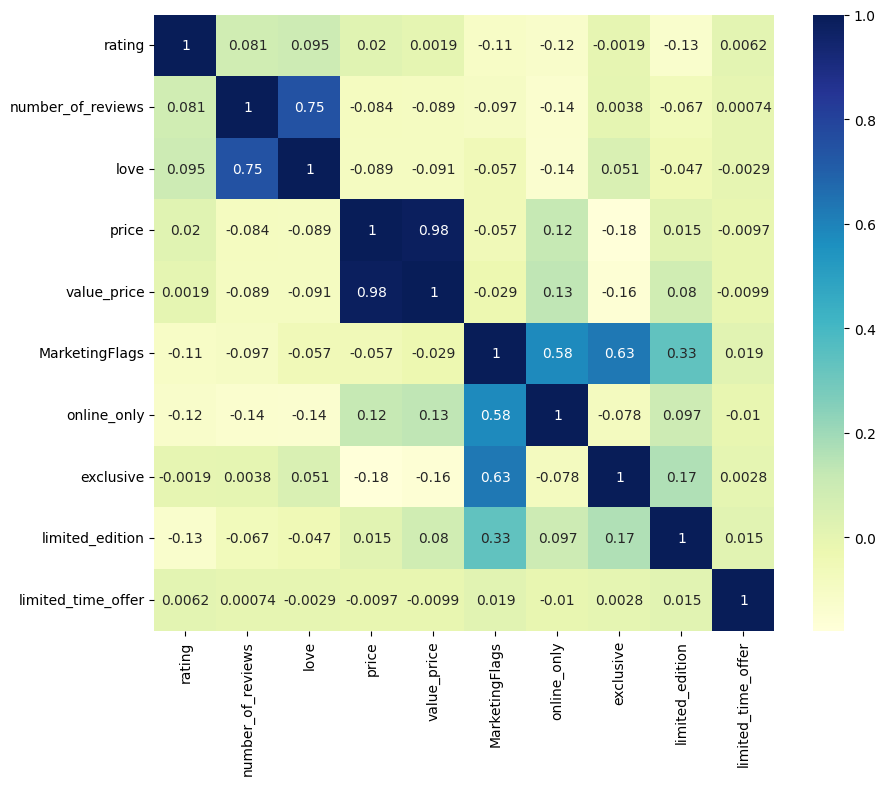

In [14]:
sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
           annot = True);

In [18]:
data_crosstab = pd.crosstab(df['exclusive'],
                            df['MarketingFlags'], 
                               margins = False)

In [19]:
data_crosstab

MarketingFlags,False,True
exclusive,,
0,4786,1955
1,0,2427


In [20]:
data_crosstab = pd.crosstab(df['online_only'],
                            df['MarketingFlags'], 
                               margins = False)

In [21]:
data_crosstab


MarketingFlags,False,True
online_only,,
0,4786,2229
1,0,2153


In [22]:
data_crosstab = pd.crosstab(df['limited_edition'],
                            df['MarketingFlags'], 
                               margins = False)

In [23]:
data_crosstab


MarketingFlags,False,True
limited_edition,,
0,4786,3540
1,0,842


- Sephora tiene 324 marcas, de las cuales la mas frecuente es SEPHORA COLLECTION.
- El tipo de producto mas frecuente son los perfumes (665), siendo un 7% de la cantidad total de los productos. 
- Observamos que Sephora tiende a no explicar como utilizar sus productos. 